In [36]:
#%pip install openpyxl
import pandas as pd

# Ruta del archivo
archivo = r"C:\Users\frans\Documents\Codigo\bigdata-ejercicios\datasets\Datasets-PUNKU-OSIPTEL\2. INTERNET FIJO\2.3. CONEXIONES DE INTERNET FIJO POR DISTRITO.xlsx"

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel(archivo, skiprows=3, header=0)

# Mostrar las primeras filas del DataFrame
print(df.head())

   Unnamed: 0    Periodo                              Empresa Departamento  \
0         NaN 2023-06-01  AGUSTINA SERVICIOS GENERALES S.A.C.  LA LIBERTAD   
1         NaN 2023-06-01  AGUSTINA SERVICIOS GENERALES S.A.C.  LA LIBERTAD   
2         NaN 2023-06-01  AGUSTINA SERVICIOS GENERALES S.A.C.  LA LIBERTAD   
3         NaN 2023-06-01            AMERICA MOVIL PERU S.A.C.       ANCASH   
4         NaN 2023-06-01            AMERICA MOVIL PERU S.A.C.       ANCASH   

  Provincia  Distrito       Tecnología     Segmento  \
0    CHEPEN    CHEPEN  5) Fibra Óptica  Residencial   
1    CHEPEN    CHEPEN  5) Fibra Óptica  Residencial   
2    CHEPEN    CHEPEN  5) Fibra Óptica  Residencial   
3     SANTA  CHIMBOTE    3) Cablemódem    Comercial   
4     SANTA  CHIMBOTE    3) Cablemódem    Comercial   

  Rango Velocidad de Bajada (nominal)  Conexiones  
0         j) 50 Mbps <= BW < 100 Mbps       115.0  
1        k) 100 Mbps <= BW < 200 Mbps        33.0  
2                   l) BW >= 200 Mbps       

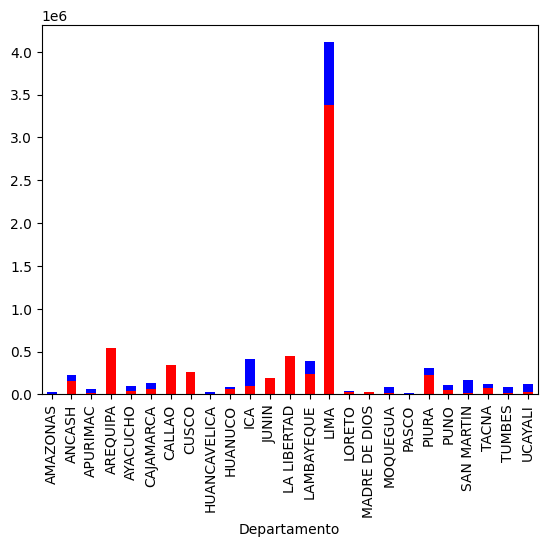

In [37]:
import matplotlib.pyplot as plt

# Filtrar los datos para los distritos de interés
df_filtered_other_department = df[~df['Departamento'].isin(['PUNO', 'JULIACA'])]

df_filtered_puno = df[df['Departamento'].isin(['PUNO'])]

df_filtered_juliaca = df[df['Departamento'].isin(['JULIACA'])]

df_internet_fibras = df[df['Tecnología'] == '5) Fibra Óptica']

df_internet_conventional = df[~df['Tecnología'].isin(['5) Fibra Óptica'])]

# Crear un grafico de barras separado por conexiones de internet convencional y por fibra óptica
fig, ax = plt.subplots()

# Filtrar los datos de fibra óptica y convencional para los departamentos de interés
df_internet_fibras_filtered = df_internet_fibras[df_internet_fibras['Departamento'].isin(['PUNO', 'JULIACA'])]
df_internet_conventional_filtered = df_internet_conventional[df_internet_conventional['Departamento'].isin(['PUNO', 'JULIACA'])]

# Agregar los datos de los otros departamentos
df_internet_fibras_filtered = pd.concat([df_internet_fibras_filtered, df_filtered_other_department[df_filtered_other_department['Tecnología'] == '5) Fibra Óptica']])
df_internet_conventional_filtered = pd.concat([df_internet_conventional_filtered, df_filtered_other_department[~df_filtered_other_department['Tecnología'].isin(['5) Fibra Óptica'])]])

# Crear el gráfico de barras
df_internet_fibras_filtered.groupby('Departamento')['Conexiones'].sum().plot(kind='bar', ax=ax, color='blue', label='Fibra óptica')
df_internet_conventional_filtered.groupby('Departamento')['Conexiones'].sum().plot(kind='bar', ax=ax, color='red', label='Conexión convencional')

plt.show()